# Приоритизация гипотез и анализ А/В теста

Описание проекта

Совместно с отделом маркетинга интернет-магазина был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипетезы, запустить A/B-тест и проанализировать результаты.

### Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Загрузска данных
path = 'input/prj_08/'
data = pd.read_csv(path + 'hypothesis.csv')

In [4]:
data.style

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#Переведем все символы в заголовках к строчному типу
data.columns = data.columns.str.lower()

In [6]:
# Проверим названия заголовков после изменения
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### Задача 1.1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [7]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Задача 1.2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [8]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

In [9]:
data[['hypothesis', 'ICE','RICE']].sort_values(by='RICE', ascending=False).style

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


#### Задача 1.3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло

Наиболее перспективные гипотезы по ICE:
*  — Запустить акцию, дающую скидку на товар в день рождения
*  — Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
*  — Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
*  — Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Наиболее перспективные гипотезы по RICE:
*  — Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (3-я позиция по ICE)
*  — Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (5-я позиция по ICE)
*  — Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (2-я позиция по ICE)
*  — Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (4-я позиция по ICE)

Выводы: приоритизация гипотез изменилась после учета охвата пользователей (параметр Reach). Например гипотеза, которая заняла первую позицию по ICE (Запустить акцию, дающую скидку на товар в день рождения) надежная, оказывает сильное влияние на охваченных пользователей, однако, охватывает небольшую группу пользователей, поэтому она заняла только 5-ю позицию по RICE.

### Часть 2. Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в 2-х файлах: orders.csv и visitors.csv.

Задача: проанализировать A/B-тест:

In [10]:
# Загрузска данных
path = 'input/prj_08/'
orders = pd.read_csv(path + 'orders.csv')
visitors = pd.read_csv(path + 'visitors.csv')

In [11]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


###### Описание данных orders
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

In [12]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


###### Описание данных visitors
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [13]:
# проверка на отсутствие дубликатов в orders
orders.duplicated().sum()

0

In [14]:
# проверка на отсутствие дубликатов в visitors
visitors.duplicated().sum()

0

In [15]:
# получение общей информации о данных в таблице
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
# получение общей информации о данных в таблице
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
# преобразование данных о времени
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


#### Задача 2.1: Построить график кумулятивной выручки по группам. Сделать выводы и предположения

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [21]:
datesGroups.head(3)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A


In [22]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
ordersAggregated.head(3)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401


In [24]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
visitorsAggregated.head(3)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338


In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

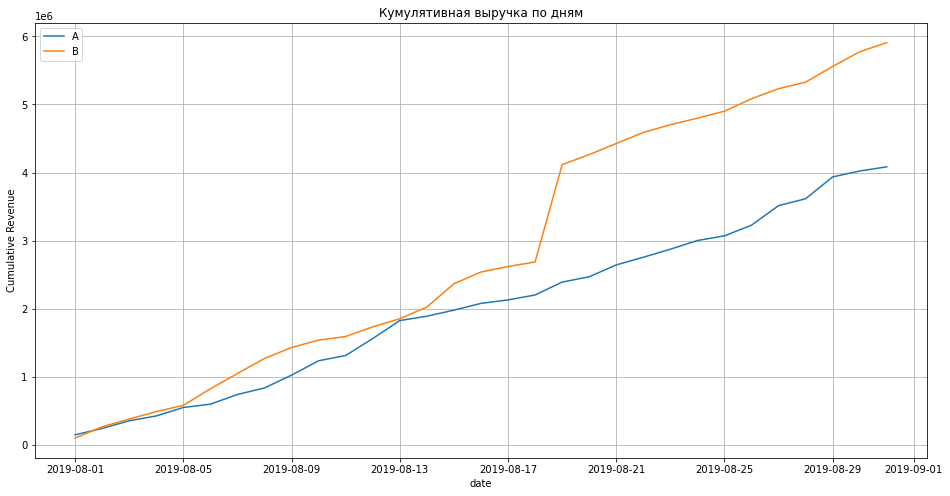

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(16,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('date')
plt.ylabel('Cumulative Revenue')
plt.grid()
plt.title('Кумулятивная выручка по дням')
plt.legend(); 

Выручка увеличивается в течении всего теста. Для группы А - выручка растет практически равномерно, а для группы В - имеется резкий рост. Это может говорить о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Задача 2.2: Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

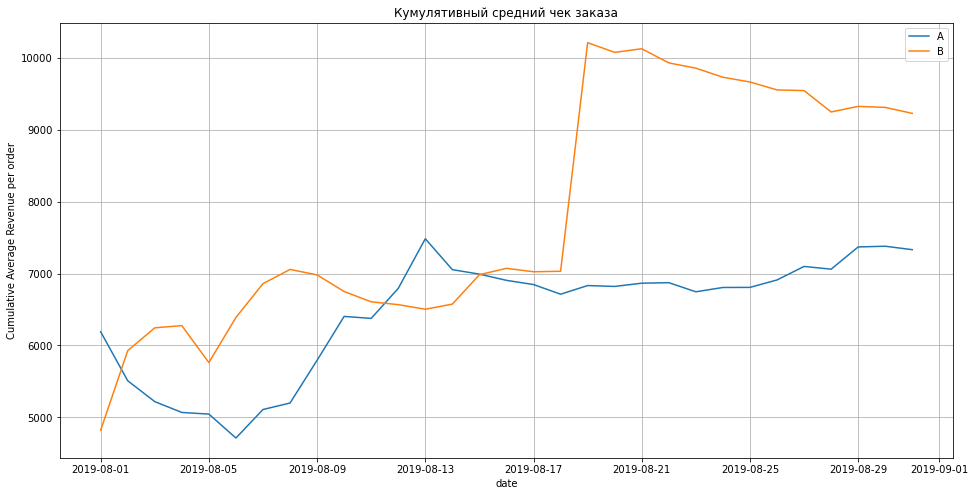

In [29]:
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('date')
plt.ylabel('Cumulative Average Revenue per order')
plt.grid()
plt.title('Кумулятивный средний чек заказа')
plt.legend();

Всплески в начале теста (первая половина месяца) говорят о чувствительности среднего кумулятивного чека к величине чека при малом количестве заказов. При малом количестве данных в начале теста - на графие имеются всплески в обоих группах. 

Средний чек становится равномерным начиная со второй середины августа (второй половины времени проведения теста). С момента стабилизации (середина месяца) средний кумулятивный чек для группы А чек стабилизируется около значения 7000. Для группы В средний кумулятивный чек начинает падать.

#### Задача 2.3: Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения

Построим график относительного различия для среднего чекая:

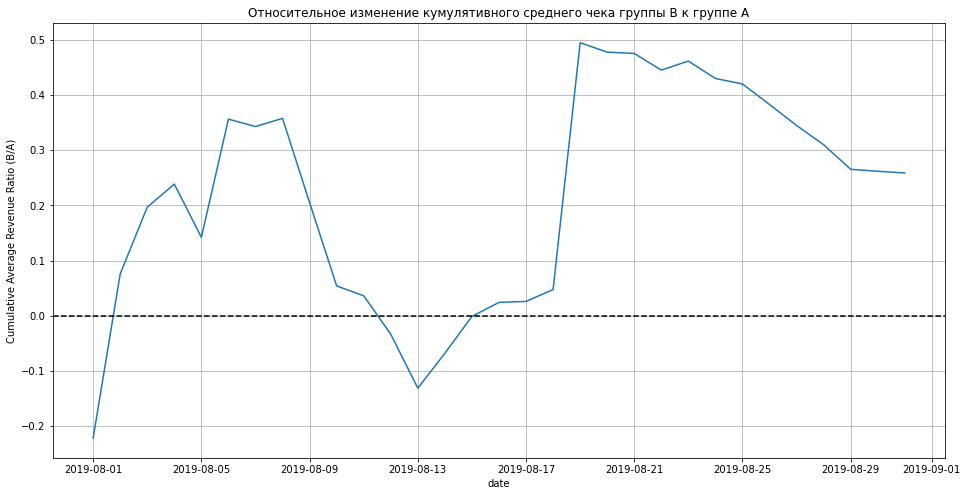

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('date')
plt.ylabel('Cumulative Average Revenue Ratio (B/A)')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid();

В нескольких точках график различия между сегментами резко «скачет». Это говорит о наличии крупных заказов в данных (выбросы) 

#### Задача 2.4:	Построить график кумулятивной конверсии по группам. Сделать выводы и предположения

Проанализируем график кумулятивной конверсии. Зададим масштаб осей, для этого передадим ему минимальное и максимальное значения оси x: минимальное и максимальное значения оси y — ["2019-08-18", '2019-09-01', 0, 0.015].

Временой промежуток 2019/08/18 - 2019/09/01 выбран по причине того, что на этом промежутке стабилизировалось поведение комулятивного среднего чека (см. Задача 2.2)


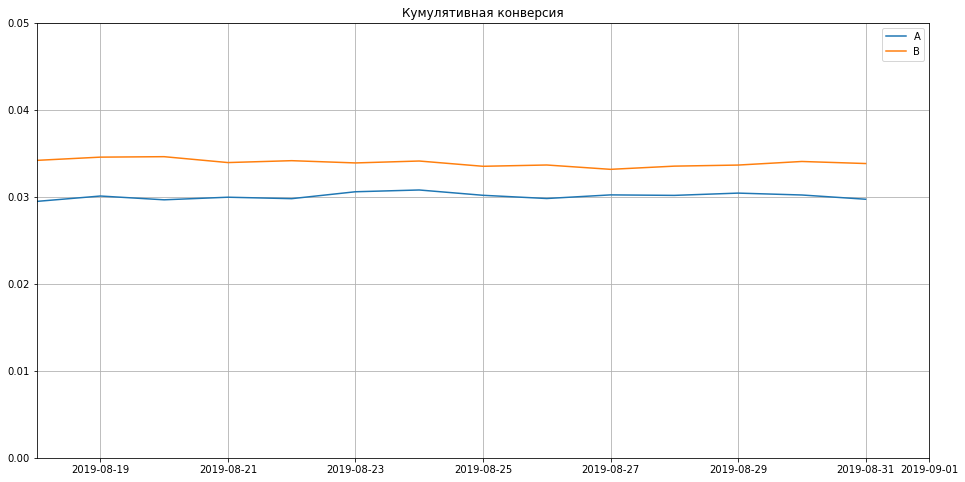

In [31]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(16,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 18), dt.datetime(2019, 9, 1), 0, 0.05])
plt.grid();

Кумулятивная конверсия для обоих групп установилась около одного своего среднего значения: для группы А - 3%, для группы В - 3.5%.  Конверсия группы В стабильно выше конверсии группы А на анализируемом промежутке.

#### Задача 2.5:	Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения

Построим график относительного различия кумулятивных конверсий. Времянной промежуток выбирем такой же как и в предыдущей задаче.

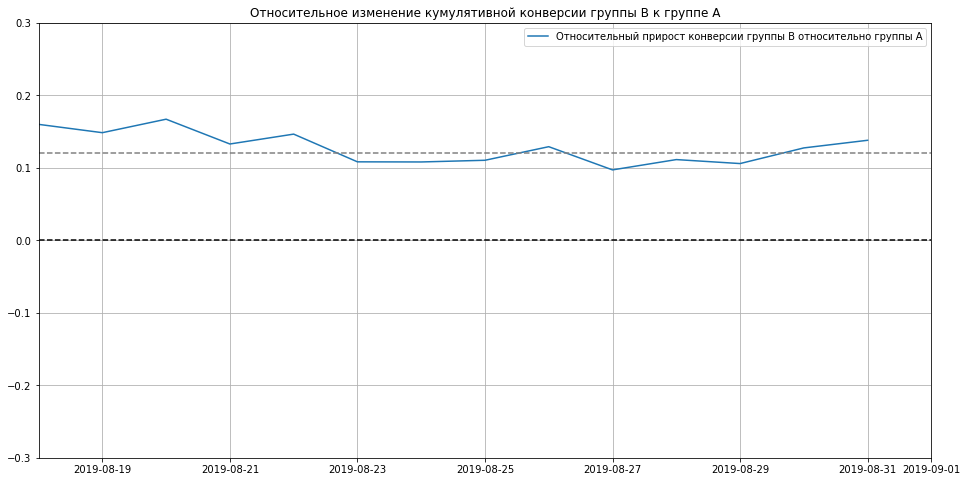

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 18), dt.datetime(2019, 9, 1), -0.3, 0.3])
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.grid();

На анализируемом промежутке времени группа В лидирует по конверсии. С 18 по 23 августа относительная кумулятивная конверсия чуть снижается и далее, кумулятивная конверсия групп В установилась около прироста в 11% относительно группы А.  

#### Задача 2.6:	Построить точечный график количества заказов по пользователям. Сделать выводы и предположения

Построим точечный график количества заказов по пользователям.

In [33]:
# создадим таблицу с количеством заказов для каждого пользователя
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']

In [34]:
# Отсортируем таблицу по количеству заказов
ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


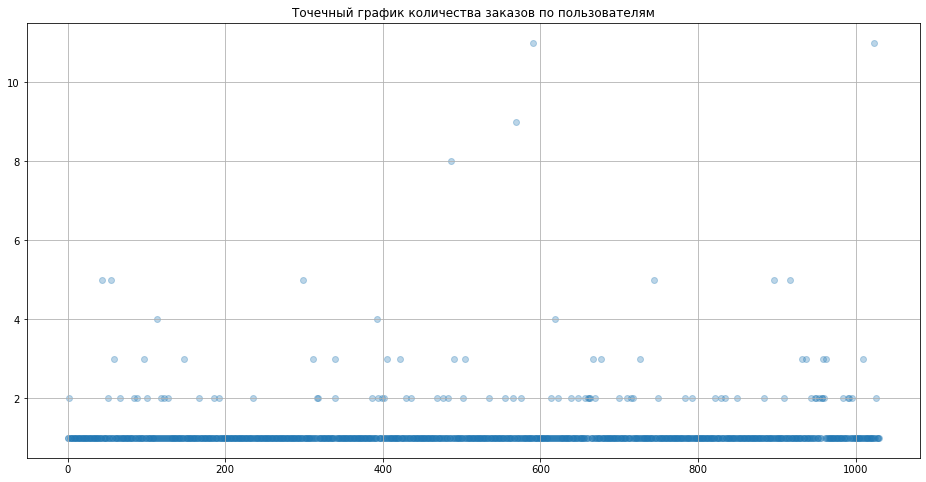

In [35]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(16,8))
plt.scatter(x_values, ordersByUsers['orders'],alpha=0.3)
plt.title('Точечный график количества заказов по пользователям')
plt.grid(); 

Из графика видно, что большинство пользователей делают по одному заказу. Не редкие случаи, когда пользователь делает по 2 заказа. Но более 4х заказов - уже редкость. Максимальное количесвто заказов среди собранных данных - 11 заказов. Таких случаев всего 2.

#### Задача 2.7: Посчитайть 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей

Построим гистограмму количества заказов с добавлением графика плотности ядра.

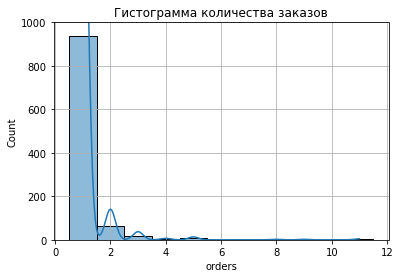

In [36]:
sns.histplot(data=ordersByUsers, x="orders", binwidth=3,discrete=True,kde=True)
plt.ylim(0, 1000)
plt.title('Гистограмма количества заказов')
plt.grid();

Теперь определим какое максимальное количество заказов делают 95 и 99% пользователей

In [37]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Выводы: 

95% пользователей делают от 1 до 2 заказов, т.е только 5% пользователей делают более 2х заказов.

99% пользователей делают до 5 заказов, т.е только 1% пользователей делают более 4х заказов.

Будем считать, что количество заказов более 2х - аномальные значения. Т.е граница определения аномальных пользователей - 95-й перцентиль

Обозначим пороговое значение максимального количество заказов на пользователя как order_th_max: 

In [38]:
order_th_max = np.percentile(ordersByUsers['orders'], [95, 99])[0]

In [39]:
# Пороговое значение количества заказов на пользователя
order_th_max

2.0

#### Задача 2.8: Построить точечный график стоимостей заказов. Сделать выводы и предположения

In [40]:
# Отсортируем таблицу по убыванию стоимости заказа
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


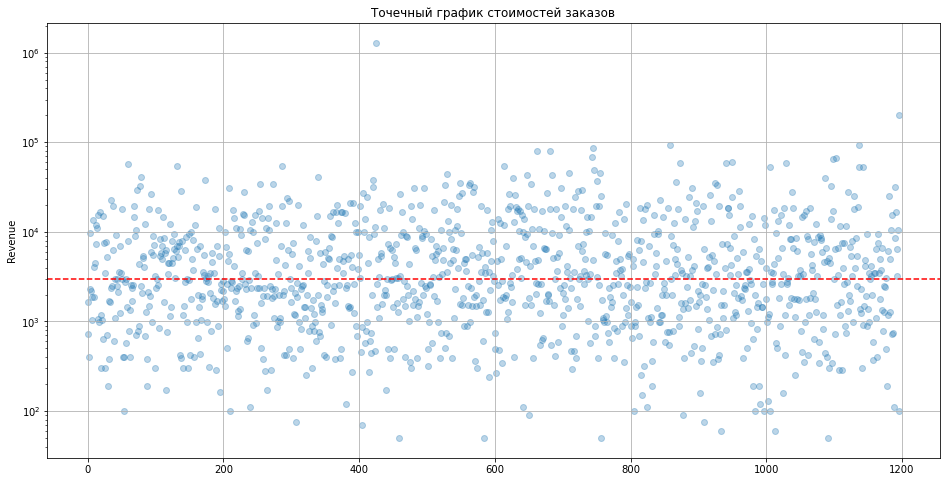

In [41]:
# Построим точечный график величины чека пользователей (в логарифмической шкале по оси y)
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16,8))
plt.yscale('log')
axes = plt.gca()
plt.scatter(x_values, orders['revenue'],alpha=0.3)
plt.axhline(y=orders['revenue'].median(), color='red', linestyle='--')
plt.ylabel('Revenue')
plt.title('Точечный график стоимостей заказов')
plt.grid(); 

In [42]:
print(f'Величина максимального чека: {orders["revenue"].max()},\nВеличина минимального чека: {orders["revenue"].min()},\nМедианное значение величины стоимости заказа: {orders["revenue"].median()}')

Величина максимального чека: 1294500,
Величина минимального чека: 50,
Медианное значение величины стоимости заказа: 2978.0


Из графика видно, что большинство чеков пользователей находится в интервале от 100 до 100 000. Значения вне этого интервала выглядят выбросами.

#### Задача 2.9: Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов

Определим 95 и 99 перцентили стоимости заказов в выборке:

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Определим 1 и 5 перцентили стоимости заказов в выборке:

In [44]:
np.percentile(orders['revenue'], [1, 5])

array([100., 300.])

Построим гистограмму стоимости заказов (с логарифмической шкалой величины чека) и отметим вертикальными линиями 5 и 95 перцентили зеленой линией, а 1 и 99 - красной

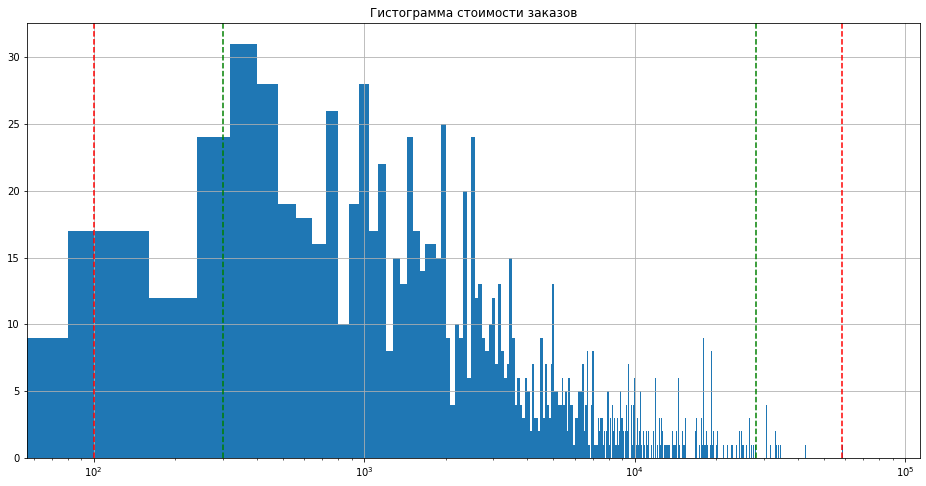

In [45]:
plt.figure(figsize=(16,8))
plt.hist(orders[['revenue']],range=[0,80000],bins=1000)
plt.axvline(x=np.percentile(orders['revenue'], [1, 5, 95, 99])[1], color='green', linestyle='--')
plt.axvline(x=np.percentile(orders['revenue'], [1, 5, 95, 99])[2], color='green', linestyle='--')
plt.axvline(x=np.percentile(orders['revenue'], [1, 5, 95, 99])[0], color='red', linestyle='--')
plt.axvline(x=np.percentile(orders['revenue'], [1, 5, 95, 99])[3], color='red', linestyle='--')
plt.title('Гистограмма стоимости заказов')
plt.xscale('log')
plt.grid();

In [46]:
print(f'Неболее, чем у 5% пользователей заказ дороже {np.percentile(orders["revenue"], [95, 99])[0]:.0f} и неболее, чем у 1% пользователей заказ дороже {np.percentile(orders["revenue"], [95, 99])[1]:.0f}')

Неболее, чем у 5% пользователей заказ дороже 28000 и неболее, чем у 1% пользователей заказ дороже 58233


In [47]:
print(f'Можно сделать вывод, что у 90% пользователей величина чека находится в интервале от {np.percentile(orders["revenue"], [5])[0]:.0f} до {np.percentile(orders["revenue"], [95])[0]:.0f}. Примем, что значения величины чека за пределами этого интервала - выбросы')

Можно сделать вывод, что у 90% пользователей величина чека находится в интервале от 300 до 28000. Примем, что значения величины чека за пределами этого интервала - выбросы


Обозначим пороговое значение максимального чека как revenue_th_max (величина чека больше этого значения будет считаться выбросом):

In [48]:
revenue_th_max = np.percentile(orders["revenue"], [95])[0]

In [49]:
revenue_th_max

28000.000000000004

Замечание: несмотря на то, что заказ меньше 300 ед. является выбросом - мы не будем исключать эти данные из анализа в дальнейшем, т.к влияние этой величина на анализ - незначительно

#### Задача 2.10: Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения

Посчитаем статистическую значимость различия конверсии. Примем за нулевую гипотезу, что конверсии не отличаются, а за альтернативную: конверсии выборок А и B - отличаются. Воспользуемся «U-критерием Манна-Уитни» для оценки различий между двумя группами. Примем уровень значимости: 0.05.

In [50]:
# Определим количество посетителей по дням:
# для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

print(visitorsADaily.head(3))
print('---- ')
print(visitorsBDaily.head(3))

        date  visitorsPerDateA
0 2019-08-01               719
1 2019-08-02               619
2 2019-08-03               507
---- 
         date  visitorsPerDateB
31 2019-08-01               713
32 2019-08-02               581
33 2019-08-03               509


In [51]:
# Посчитаем кумулятивное число посетитилей по дням:
#для группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#для группы B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

print(visitorsACummulative.head(3))
print(' ------- ')
print(visitorsBCummulative.head(3))

        date  visitorsCummulativeA
0 2019-08-01                   719
1 2019-08-02                  1338
2 2019-08-03                  1845
 ------- 
         date  visitorsCummulativeB
31 2019-08-01                   713
32 2019-08-02                  1294
33 2019-08-03                  1803


In [52]:
# Посчитаем количество и сумму заказов по дням:
# для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

print(ordersADaily.head(3))
print(' ----- ')
print(ordersBDaily.head(3))

        date  ordersPerDateA  revenuePerDateA
0 2019-08-01              24           148579
1 2019-08-02              20            93822
2 2019-08-03              24           112473
 ----- 
        date  ordersPerDateB  revenuePerDateB
0 2019-08-01              21           101217
1 2019-08-02              24           165531
2 2019-08-03              16           114248


In [53]:
# Посчитаем кумулятивное количество и сумму заказов по дням:
# для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# для группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

print(ordersACummulative.head(3))
print(' ----- ')
print(ordersBCummulative.head(3))

        date  ordersCummulativeA  revenueCummulativeA
0 2019-08-01                  24               148579
1 2019-08-02                  44               242401
2 2019-08-03                  68               354874
 ----- 
        date  ordersCummulativeB  revenueCummulativeB
0 2019-08-01                  21               101217
1 2019-08-02                  45               266748
2 2019-08-03                  61               380996


In [54]:
# Объеденим данные в одной таблице
data_init = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [55]:
data_init.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [56]:
# Добавим в таблицу колонки с конверсией (в том числе кумулятивной) для группы А и В
# считаем конверсию для группы А
data_init['conversionPerDateA'] = data_init['ordersPerDateA']/data_init['visitorsPerDateA']
# считаем конверсию для группы B
data_init['conversionPerDateB'] = data_init['ordersPerDateB']/data_init['visitorsPerDateB']

# считаем кумулятивную конверсию для группы А
data_init['cumul_conversionPerDateA'] = data_init['ordersCummulativeA']/data_init['visitorsCummulativeA']
# считаем кумулятивную конверсию для группы B
data_init['cumul_conversionPerDateB'] = data_init['ordersCummulativeB']/data_init['visitorsCummulativeB']

In [57]:
data_init.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,conversionPerDateA,conversionPerDateB,cumul_conversionPerDateA,cumul_conversionPerDateB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713,0.033380,0.029453,0.033380,0.029453
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294,0.032310,0.041308,0.032885,0.034776
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803,0.047337,0.031434,0.036856,0.033833
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573,0.022315,0.022078,0.032787,0.030315
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280,0.033069,0.032532,0.032851,0.030793


In [58]:
# Создадим таблицы для пользователей, которые заказывали хотя бы 1 раз и укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [59]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_init['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_init['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Статистическая значимость различия конверсии по результатам месячного теста с применением теста Манна-Уитни:

In [60]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.01679


In [61]:
# Относительное различие в конверсии между группами:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


Вывод: P-value меньше 0,05, поэтому нулевую гипотезу отвергаем: конверсия групп А и В - отличается по "сырым" данным. Относительный прирост конверсии группы В к конверсии группы A равен 14%.

#### Задача 2.11: Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения

Посчитаем статистическую значимость различия средних чеков между группами. Примем за нулевую гипотезу, что средний чек не отличается между двумя группами, за альтернативную - отличается.

In [62]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.729


Посчитаем относительный прирост среднего чека группы В:

In [63]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


Вывод: P-value больше 0,05, следовательно, статистически значимых отличий в среднем чеке между группами нет. Однако, относительное различие среднего чека между группами составляет 26%.

#### Задача 2.12: Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения

In [64]:
# Покажем ранее определенное пороговое значения количества заказов на пользователя
order_th_max

2.0

In [65]:
# Покажем ранее определенное пороговое значение величины чека
revenue_th_max

28000.000000000004

In [66]:
print(f'Примим за аномальных пользователей тех, кто совершил более {order_th_max:.0f} заказов, или совершил заказ на сумму свыше {revenue_th_max :.0f} рублей.\nТак мы исключим 5% пользователей с наибольшим числом заказов и 5% заказов с наибольшей стоимостью.')

Примим за аномальных пользователей тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 28000 рублей.
Так мы исключим 5% пользователей с наибольшим числом заказов и 5% заказов с наибольшей стоимостью.


In [67]:
# Срез пользователей, совершивших более order_th_max заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_th_max]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_th_max]['visitorId'],
    ],
    axis=0,
)

In [68]:
usersWithManyOrders.head(3)

18    199603092
23    237748145
68    611059232
Name: visitorId, dtype: int64

In [69]:
# Срез пользователей, совершивших заказы дороже revenue_th_max
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_th_max]['visitorId']

In [70]:
usersWithExpensiveOrders.head(3)

60    4256040402
73    2947100995
77     787824685
Name: visitorId, dtype: int64

In [71]:
# Объединим две таблицы 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [72]:
abnormalUsers.head(3)

1099    148427295
18      199603092
928     204675465
Name: visitorId, dtype: int64

Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей. Примем за нулевую гипотезу, что конверсии не отличаются, а за альтернативную: конверсии выборок А и B - отличаются.

In [73]:
# Очищенные данные о заказах группы А (не включая аномальных пользователей)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_init['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [74]:
# Очищенные данные о заказах группы В (не включая аномальных пользователей)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_init['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [75]:
# Статистическая значимость различия конверсии по очищенным результатам месячного теста:
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.01304


In [76]:
# Относительное различие в конверсии между группами:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.173


Вывод: P-value меньше 0,05 (как и по "сырым" данным), поэтому нулевую гипотезу отвергаем: конверсия групп А и В - отличается по очищенным данным. Относительный прирост конверсии группы В к конверсии группы A равен 17% (что выше, чем по "сырым" данным, где было 14%).

Таким образом, сегмент В значительно лучше сегмента А.

#### Задача 2.13: Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения

Посчитаем статистическую значимость различия средних чеков между группами по очищенным данным. Примем за нулевую гипотезу, что средний чек не отличается между двумя группами, за альтернативную - отличается.

In [77]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

0.738


Посчитаем относительный прирост среднего чека группы В:

In [78]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

-0.020


Вывод: P-value больше 0,05 (0.738 по очищенным данным и 0.729 по "сырым" данным), следовательно, статистически значимых отличий в среднем чеке между группами нет. 

По чищенным данным относительное различие среднего чека между группами составляет: -2% (по "сырым" данным было +26%).

Таким образом, даже после удаления выбросов P-value значительно выше 0.05. Т.е мы не смогли опровергнуть нулевую гипотезу. Из этого можно сделать вывод что средний чек в двух группах не оличается. 

После очищения данных отличие по выручке снизилось с 26% до -2% и это отличие не стало статистически значимым.

#### Задача 2.14: Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест

Для визуализации изменений после фильтрации данных построим на одном графике кумулятивную конверсию до и после фильтрации и также, на одном графике величину кумулятивного среднего чека по группам.

In [79]:
# отфильтрованные данные по заказам
orders_f = orders.query("visitorId not in @abnormalUsers")

In [80]:
# Создадим таблицу для отфильтрованных данных с кумулятивной конверсией по группам:
# Посчитаем количество и сумму заказов по дням:
# для группы А
ordersADaily_f = (
    orders_f[orders_f['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily_f.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# для группы B
ordersBDaily_f = (
    orders_f[orders_f['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily_f.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


# Посчитаем кумулятивное количество и сумму заказов по дням:
# для группы А
ordersACummulative_f = ordersADaily_f.apply(
    lambda x: ordersADaily_f[ordersADaily_f['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative_f.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# для группы B
ordersBCummulative_f = ordersBDaily_f.apply(
    lambda x: ordersBDaily_f[ordersBDaily_f['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative_f.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


# Объеденим данные в одной таблице
data_init_f = (
    ordersADaily_f.merge(
        ordersBDaily_f, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative_f, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative_f, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [81]:
# Добавим в таблицу колонки с конверсией (в том числе кумулятивной) для группы А и В
# считаем конверсию для группы А
data_init_f['conversionPerDateA'] = data_init_f['ordersPerDateA']/data_init_f['visitorsPerDateA']
# считаем конверсию для группы B
data_init_f['conversionPerDateB'] = data_init_f['ordersPerDateB']/data_init_f['visitorsPerDateB']

# считаем кумулятивную конверсию для группы А
data_init_f['cumul_conversionPerDateA'] = data_init_f['ordersCummulativeA']/data_init_f['visitorsCummulativeA']
# считаем кумулятивную конверсию для группы B
data_init_f['cumul_conversionPerDateB'] = data_init_f['ordersCummulativeB']/data_init_f['visitorsCummulativeB']

In [82]:
data_init_f.head(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,conversionPerDateA,conversionPerDateB,cumul_conversionPerDateA,cumul_conversionPerDateB
0,2019-08-01,16,54351,19,78258,16,54351,19,78258,719,713,719,713,0.022253,0.026648,0.022253,0.026648
1,2019-08-02,19,92132,21,93234,35,146483,40,171492,619,581,1338,1294,0.030695,0.036145,0.026158,0.030912
2,2019-08-03,24,112473,16,114248,59,258956,56,285740,507,509,1845,1803,0.047337,0.031434,0.031978,0.031059


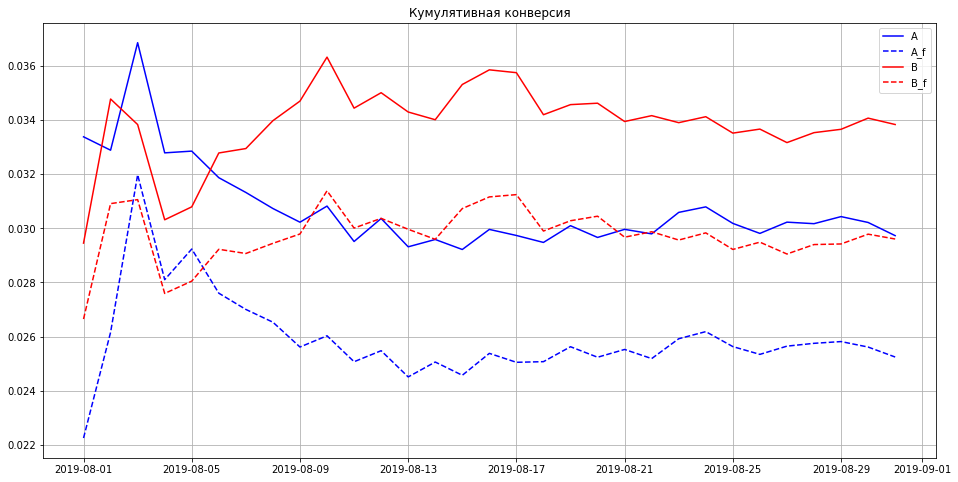

In [83]:
# Построим график кумулятивной конверсии по группам для "сырых" и отфильтрованных данных
plt.figure(figsize=(16,8))

plt.plot(data_init['date'], data_init['cumul_conversionPerDateA'],color='b', label='A')
plt.plot(data_init_f['date'], data_init_f['cumul_conversionPerDateA'],'b--', label='A_f')
plt.plot(data_init['date'], data_init['cumul_conversionPerDateB'],color='r', label='B')
plt.plot(data_init_f['date'], data_init_f['cumul_conversionPerDateB'],'r--', label='B_f')
plt.legend()
plt.title('Кумулятивная конверсия')
plt.grid()
plt.show();

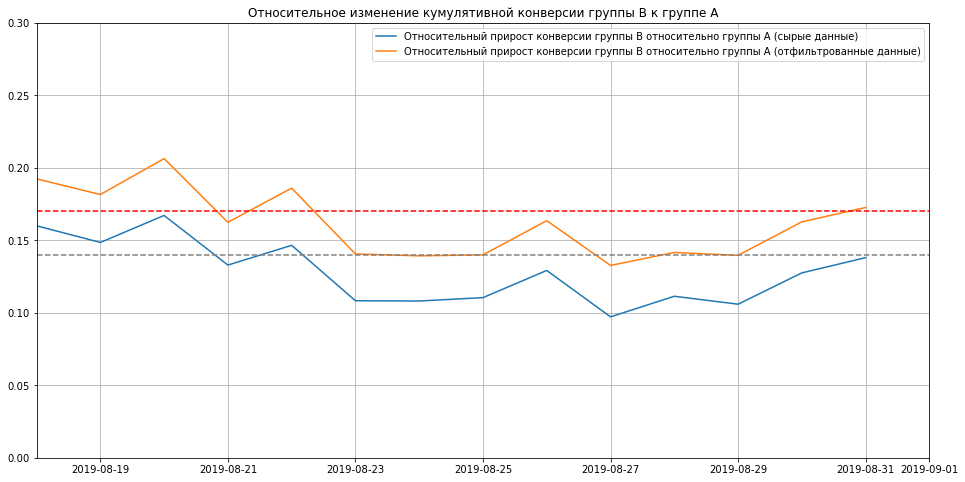

In [84]:
#Построим график относительного различия кумулятивных конверсий для "сырых" и отфильтрованных данных
plt.figure(figsize=(16,8))
plt.plot(data_init['date'], data_init['cumul_conversionPerDateB']/data_init['cumul_conversionPerDateA']-1, label="Относительный прирост конверсии группы B относительно группы A (сырые данные)")
plt.plot(data_init['date'], data_init_f['cumul_conversionPerDateB']/data_init_f['cumul_conversionPerDateA']-1, label="Относительный прирост конверсии группы B относительно группы A (отфильтрованные данные)")
plt.legend()

plt.axhline(y=0.17, color='red', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 18), dt.datetime(2019, 9, 1), 0, 0.3])
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.grid();

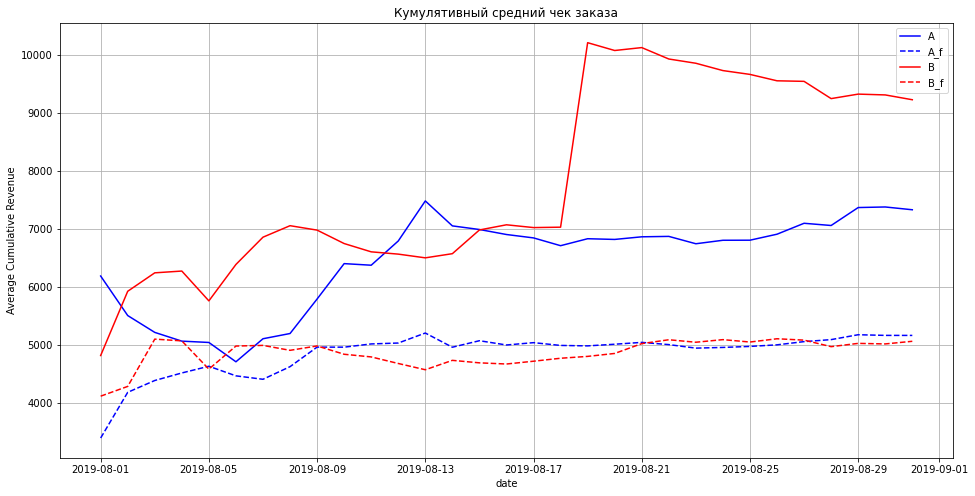

In [85]:
# Построим графики среднего чека по группам  для "сырых" и отфильтрованных данных
plt.figure(figsize=(16,8))
plt.plot(data_init['date'], data_init['revenueCummulativeA']/data_init['ordersCummulativeA'],'b', label='A')
plt.plot(data_init['date'], data_init_f['revenueCummulativeA']/data_init_f['ordersCummulativeA'],'b--', label='A_f')
plt.plot(data_init['date'], data_init['revenueCummulativeB']/data_init['ordersCummulativeB'],'r', label='B')
plt.plot(data_init['date'], data_init_f['revenueCummulativeB']/data_init_f['ordersCummulativeB'],'r--', label='B_f')
plt.xlabel('date')
plt.ylabel('Average Cumulative Revenue')
plt.title('Кумулятивный средний чек заказа')
plt.grid()
plt.legend();

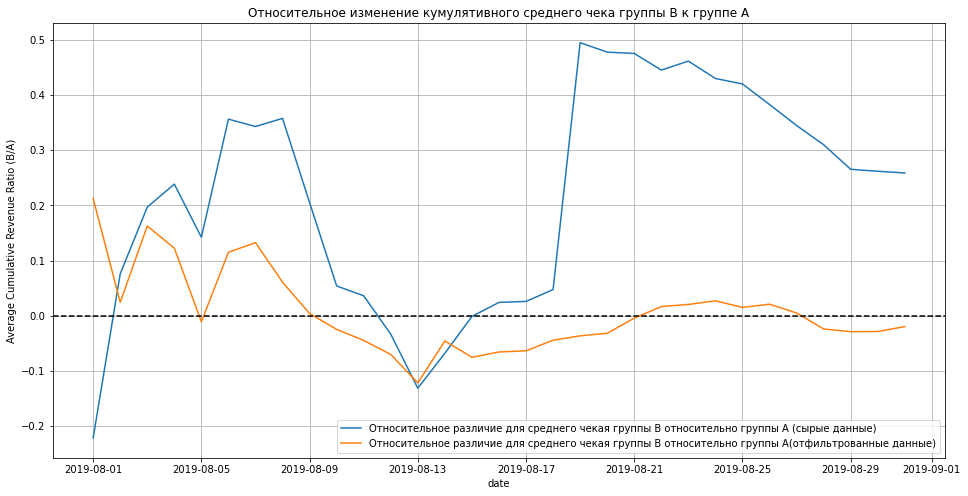

In [86]:
# Построим график относительного различия для среднего чекая для "сырых" и отфильтрованных данных
plt.figure(figsize=(16,8))
# cтроим отношение средних чеков
plt.plot(data_init['date'], (data_init['revenueCummulativeB']/data_init['ordersCummulativeB'])/(data_init['revenueCummulativeA']/data_init['ordersCummulativeA'])-1,
        label="Относительное различие для среднего чекая группы B относительно группы A (сырые данные)")
plt.plot(data_init['date'], (data_init_f['revenueCummulativeB']/data_init_f['ordersCummulativeB'])/(data_init_f['revenueCummulativeA']/data_init_f['ordersCummulativeA'])-1,
        label="Относительное различие для среднего чекая группы B относительно группы A(отфильтрованные данные)")

plt.legend()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('date')
plt.ylabel('Average Cumulative Revenue Ratio (B/A)')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid();

Выводы: по результатам проведенных расчетов можно сделать следующие заключения:

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Конверсия группы В больше конверсии группы А на 17% на конец теста по отфильтрованным данным.

Как по сырым данным так и после фильтрации нет статистически значимого различия по среднему чеку между группами. 

Так как конверсия значительно выросла, хотя средний чек не изменился, можно признать тест успешным и остановить его.